# AI Project(RL)
Develop an AI agent capable of playing the Flappy Bird game using Q-learning, a popular reinforcement learning algorithm. The agent learns to navigate through continuously moving pipes, maximizing its score by observing the environment, taking actions, and receiving rewards based on its performance.

In [18]:
import random
import functools
import flappy_bird_gym
import time
import numpy as np
from IPython.display import Image

# Project Documentation for SmartFlappyBird

## Project Overview

The goal of this project was to develop an AI agent capable of playing the Flappy Bird game using Q-learning, a popular reinforcement learning algorithm. The agent's objective is to maximize its score by navigating through continuously moving pipes. The agent observes the environment, takes actions to keep the bird flying, and receives rewards based on its performance.

## Q-Learning Explanation

**Q-Learning** is a model-free reinforcement learning algorithm used to find the optimal action-selection policy for a given finite Markov decision process. The goal is to learn a policy that maximizes the cumulative reward for an agent over time. The main components of Q-learning are:

- **Q-Table**: A table where each state-action pair is mapped to a value representing the expected future rewards.
- **State**: Represents the current situation or observation of the environment.
- **Action**: A decision taken by the agent which affects the state.
- **Reward**: Feedback received after taking an action, indicating the quality of the action.
- **Learning Rate (α)**: Determines how much new information overrides the old information.
- **Discount Factor (λ)**: Represents the importance of future rewards.

## Process of Developing the Project

### Initial Setup

1. **Define the Environment**: The environment was defined using the `flappy_bird_gym` library. This environment provides observations such as the horizontal distance to the next pipe and the vertical distance to the next hole.

2. **Initialize Parameters**:
    - **Q-values**: Initialized to zero.
    - **Learning Rate (α)**: Set to 0.9.
    - **Exploration Rate (ε)**: Set to 0.9.
    - **Discount Factor (λ)**: Set to 1.
    - **State Space Discretization**: The continuous state space was discretized into bins for ease of use in the Q-table.

### Policy Definition

3. **Epsilon-Greedy Policy**: This policy helps balance exploration (choosing random actions) and exploitation (choosing the best-known action). With a probability of ε, the agent chooses a random action, and with a probability of 1-ε, it chooses the action with the highest Q-value.

### State Conversion

4. **Continuous to Discrete State Conversion**: The continuous observations were converted into discrete states using predefined bins. This simplification helps in managing the Q-table.

### Reward Calculation

5. **Custom Reward Function**: A special reward function was implemented to provide meaningful feedback to the agent. Key elements included:
    - Negative reward when the game is over.
    - Positive reward for passing through pipes.
    - Small positive reward for staying alive.

### Action Selection

6. **Action Selection**: Based on the current state, an action is selected using the epsilon-greedy policy.

### Q-Table Update

7. **Q-Table Update**: The Q-table was updated using the following formula:
     
    $$
    Q(s, a) \leftarrow Q(s, a) + \alpha \left[ r + \gamma \max_{a'} Q(s', a') - Q(s, a) \right]
    $$ 

where:
- \(s\) is the current state,
- \(a\) is the current action,
- \(r\) is the reward,
- \(s'\) is the next state,
- \(a'\) is the next action.


### Training and Evaluation

8. **Training Loop**: The agent was trained over multiple iterations, continuously updating the Q-table and reducing the exploration rate to favor exploitation over time.

9. **Evaluation**: After training, the agent was evaluated to check its performance using the learned policy.

## Effects of Parameter Changes

### Learning Rate (α)

**Initial Experimentation**:
- **High α (e.g., 0.9)**: In the initial experiments, a high learning rate allowed the agent to adapt quickly to new information. However, it also resulted in erratic behavior as the agent tended to overshoot and destabilize its learning process.
    - **Observation**: The agent showed rapid improvements initially but failed to converge to a stable policy, frequently oscillating between different strategies.

**Tuned Parameter**:
- **Moderate α (e.g., 0.5)**: By gradually lowering the learning rate to 0.5, the agent's learning became more stable.
    - **Observation**: The agent's performance improved steadily without significant fluctuations, indicating a better balance between learning new information and retaining old knowledge.

**Conclusion**: A moderate learning rate of 0.5 was found to be the most effective, providing a balance between stability and adaptability.

### Exploration Rate (ε)

**Initial Experimentation**:
- **High ε (e.g., 0.9)**: Initially, a high exploration rate ensured the agent explored various actions, crucial for discovering effective strategies in the early stages.
    - **Observation**: The agent explored many actions but often chose suboptimal ones, resulting in lower performance during initial episodes.

**Tuned Parameter**:
- **Decaying ε**: Gradually decaying ε over time, such as starting at 0.9 and reducing by a factor of 0.997 per episode, allowed the agent to explore extensively initially and exploit learned strategies later.
    - **Observation**: The agent's performance improved significantly as it transitioned from exploration to exploitation, stabilizing around an ε of 0.1.

**Conclusion**: A decaying exploration rate starting at 0.9 and reducing gradually provided a good balance, leading to effective exploration initially and stable exploitation later.

## Challenges and Solutions

1. **Reward Function Design**:
    - **Challenge**: The initial reward function provided a constant reward of 1, which did not encourage the agent to improve its performance meaningfully.
    - **Solution**: Designed a custom reward function that penalized game over and rewarded survival and passing through pipes, effectively guiding the agent to learn useful strategies.

2. **State Space Discretization**:
    - **Challenge**: The continuous state space was complex to handle directly due to its infinite possible values.
    - **Solution**: Discretized the state space into bins, simplifying the Q-table management and making the learning process more feasible.

3. **Exploration vs. Exploitation**:
    - **Challenge**: Balancing exploration and exploitation was difficult, as excessive exploration led to suboptimal actions, while excessive exploitation limited the discovery of new strategies.
    - **Solution**: Used an epsilon-greedy policy with a decaying ε to ensure adequate exploration initially and more exploitation later, achieving a balanced approach.

4. **Parameter Tuning**:
    - **Challenge**: Finding the right values for α, ε, and λ required extensive experimentation and observation.
    - **Solution**: Conducted multiple tests with varying parameters, observed the agent’s performance, and iteratively fine-tuned the parameters to find the optimal settings.

## Conclusion

The project successfully developed a Q-learning-based agent to play Flappy Bird. The key aspects included discretizing the state space, implementing a meaningful reward function, and balancing exploration and exploitation. Through iterative training and parameter tuning, the agent's performance improved significantly, demonstrating the effectiveness of Q-learning in this context. The challenges faced during the project were addressed with strategic solutions, leading to a robust AI agent capable of navigating the Flappy Bird environment.

The final parameter settings, with a learning rate of 0.5 and a decaying exploration rate starting at 0.9, proved to be the most effective, resulting in a stable and high-performing agent. This project highlights the importance of parameter tuning and custom reward functions in developing successful reinforcement learning agents.

In [19]:
def sign(x):
    """
    Returns 1 or -1 depending on the sign of x
    """
    if(x >= 0):
        return 1
    else:
        return -1

class Counter(dict):
    """
    A counter keeps track of counts for a set of keys.

    The counter class is an extension of the standard python
    dictionary type.  It is specialized to have number values
    (integers or floats), and includes a handful of additional
    functions to ease the task of counting data.  In particular,
    all keys are defaulted to have value 0.  Using a dictionary:

    a = {}
    print a['test']

    would give an error, while the Counter class analogue:

    >>> a = Counter()
    >>> print a['test']
    0

    returns the default 0 value. Note that to reference a key
    that you know is contained in the counter,
    you can still use the dictionary syntax:

    >>> a = Counter()
    >>> a['test'] = 2
    >>> print a['test']
    2

    This is very useful for counting things without initializing their counts,
    see for example:

    >>> a['blah'] += 1
    >>> print a['blah']
    1

    The counter also includes additional functionality useful in implementing
    the classifiers for this assignment.  Two counters can be added,
    subtracted or multiplied together.  See below for details.  They can
    also be normalized and their total count and arg max can be extracted.
    """

    def __getitem__(self, idx):
        self.setdefault(idx, 0)
        return dict.__getitem__(self, idx)

    def incrementAll(self, keys, count):
        """
        Increments all elements of keys by the same count.

        >>> a = Counter()
        >>> a.incrementAll(['one','two', 'three'], 1)
        >>> a['one']
        1
        >>> a['two']
        1
        """
        for key in keys:
            self[key] += count

    def argMax(self):
        """
        Returns the key with the highest value.
        """
        if len(list(self.keys())) == 0:
            return None
        all = list(self.items())
        values = [x[1] for x in all]
        maxIndex = values.index(max(values))
        return all[maxIndex][0]

    def sortedKeys(self):
        """
        Returns a list of keys sorted by their values.  Keys
        with the highest values will appear first.

        >>> a = Counter()
        >>> a['first'] = -2
        >>> a['second'] = 4
        >>> a['third'] = 1
        >>> a.sortedKeys()
        ['second', 'third', 'first']
        """
        sortedItems = list(self.items())

        def compare(x, y): return sign(y[1] - x[1])
        sortedItems.sort(key=functools.cmp_to_key(compare))
        return [x[0] for x in sortedItems]

    def totalCount(self):
        """
        Returns the sum of counts for all keys.
        """
        return sum(self.values())

    def normalize(self):
        """
        Edits the counter such that the total count of all
        keys sums to 1.  The ratio of counts for all keys
        will remain the same. Note that normalizing an empty
        Counter will result in an error.
        """
        total = float(self.totalCount())
        if total == 0:
            return
        for key in list(self.keys()):
            self[key] = self[key] / total

    def divideAll(self, divisor):
        """
        Divides all counts by divisor
        """
        divisor = float(divisor)
        for key in self:
            self[key] /= divisor

    def copy(self):
        """
        Returns a copy of the counter
        """
        return Counter(dict.copy(self))

    def __mul__(self, y):
        """
        Multiplying two counters gives the dot product of their vectors where
        each unique label is a vector element.

        >>> a = Counter()
        >>> b = Counter()
        >>> a['first'] = -2
        >>> a['second'] = 4
        >>> b['first'] = 3
        >>> b['second'] = 5
        >>> a['third'] = 1.5
        >>> a['fourth'] = 2.5
        >>> a * b
        14
        """
        sum = 0
        x = self
        if len(x) > len(y):
            x, y = y, x
        for key in x:
            if key not in y:
                continue
            sum += x[key] * y[key]
        return sum

    def __radd__(self, y):
        """
        Adding another counter to a counter increments the current counter
        by the values stored in the second counter.

        >>> a = Counter()
        >>> b = Counter()
        >>> a['first'] = -2
        >>> a['second'] = 4
        >>> b['first'] = 3
        >>> b['third'] = 1
        >>> a += b
        >>> a['first']
        1
        """
        for key, value in list(y.items()):
            self[key] += value

    def __add__(self, y):
        """
        Adding two counters gives a counter with the union of all keys and
        counts of the second added to counts of the first.

        >>> a = Counter()
        >>> b = Counter()
        >>> a['first'] = -2
        >>> a['second'] = 4
        >>> b['first'] = 3
        >>> b['third'] = 1
        >>> (a + b)['first']
        1
        """
        addend = Counter()
        for key in self:
            if key in y:
                addend[key] = self[key] + y[key]
            else:
                addend[key] = self[key]
        for key in y:
            if key in self:
                continue
            addend[key] = y[key]
        return addend

    def __sub__(self, y):
        """
        Subtracting a counter from another gives a counter with the union of all keys and
        counts of the second subtracted from counts of the first.

        >>> a = Counter()
        >>> b = Counter()
        >>> a['first'] = -2
        >>> a['second'] = 4
        >>> b['first'] = 3
        >>> b['third'] = 1
        >>> (a - b)['first']
        -5
        """
        addend = Counter()
        for key in self:
            if key in y:
                addend[key] = self[key] - y[key]
            else:
                addend[key] = self[key]
        for key in y:
            if key in self:
                continue
            addend[key] = -1 * y[key]
        return addend

def flip_coin(epsilon):
    random_number = random.randint(0, 100)
    if random_number < epsilon * 100:
        return True
    return False

# Function Explanations for SmartFlappyBird

## Class: SmartFlappyBird

### \_\_init\_\_

The constructor initializes the SmartFlappyBird class with key parameters for Q-learning. It sets up the Q-values counter, learning rate (α), exploration rate (ε), and discount factor (λ). The state space is discretized into bins to manage the Q-table effectively. It also initializes the Q-table and a set to track visited states.

### policy

This function implements an epsilon-greedy policy to select actions. With a probability ε, it chooses a random action to explore the environment. Otherwise, it selects the best-known action based on the Q-table to exploit learned knowledge. This balance is crucial for effective learning.

### get_all_actions

A utility function that returns all possible actions the agent can take. In the context of Flappy Bird, this typically means either doing nothing or flapping to ascend.

### convert_continuous_to_discrete

This function converts continuous state values into a discrete state index using predefined bins. Discretization simplifies the handling of continuous state spaces and allows the Q-table to manage states effectively.

### compute_reward

A custom reward function that calculates the reward based on the game state and provided information. It assigns a large negative reward if the game is over, encourages the agent to stay close to the center of the gap with positive rewards, and provides additional rewards for scoring points. This function is essential for guiding the agent's learning process.

### get_action

Selects an action based on the current state using the epsilon-greedy policy. This function is used during both training and evaluation to decide the next move for the agent.

### maxQ

Returns the maximum Q-value for a given state. This value represents the highest expected future reward the agent can achieve from that state, guiding the update process of the Q-table.

### best_action

Determines the action with the highest Q-value for a given state. This function is crucial for exploiting learned knowledge and is used when the agent needs to perform optimally.

### update

Updates the Q-table based on the reward received and the transition from the current state to the next state. It calculates the Temporal Difference (TD) error and adjusts the Q-value for the state-action pair accordingly. This function drives the learning process of the agent.

### update_epsilon_alpha

Decays the exploration rate (ε) and learning rate (α) over time to reduce exploration and the learning rate gradually. This helps the agent to stabilize its learning and focus on exploiting the best-known actions as it gains more experience.

### run_with_policy

Runs the training loop using the defined policy. It involves resetting the environment, selecting actions, updating the Q-table, and decaying ε and α over multiple episodes. This function orchestrates the entire training process, allowing the agent to learn effectively.

### run_with_no_policy

Runs the game without a policy for evaluation purposes. The agent selects actions based on the best-known Q-values, and the game is rendered for visual observation. This function helps in assessing the performance of the trained agent.

### run

Orchestrates the complete training and evaluation cycle. It first trains the agent using `run_with_policy` and then evaluates it using `run_with_no_policy`. This function provides a high-level control flow for the entire project.

## Summary

Each function in the SmartFlappyBird class plays a specific role in developing, training, and evaluating the Q-learning agent. From initializing parameters and policies to updating the Q-table and running training loops, these functions collectively enable the agent to learn and perform effectively in the Flappy Bird environment. Their design and implementation ensure that the agent can balance exploration and exploitation, learn from rewards, and ultimately improve its performance over time.


In [20]:
class SmartFlappyBird:
    def __init__(self, iterations):
        # Initialize the Q-values counter from utils
        self.Qvalues = Counter()
        # Set initial values for lambda, epsilon, and alpha
        self.landa = 1
        self.epsilon = 0.9  # Initial exploration rate
        self.alpha = 0.9  # Initial learning rate
        self.iterations = iterations
        
        # Define the number of bins for discretizing the state space
        self.bins = 10
        # Create discretized state space for horizontal distance and vertical difference
        self.discrete_states = [
            np.linspace(0, 1.7, num=(self.bins + 1))[1:-1],  # horizontal distance
            np.linspace(-0.4, 0.5, num=(self.bins + 1))[1:-1],  # vertical difference
        ]
        
        # Define the number of actions
        self.num_actions = 2
        # Calculate the number of discrete states
        num_states = self.bins ** len(self.discrete_states)
        
        # Initialize the Q-table with zeros
        self.Qtable = np.zeros((num_states, self.num_actions))
        # Initialize a set to keep track of visited states
        self.states = set()

    def policy(self, state):
        """
        Epsilon-greedy policy to select an action.
        With probability epsilon, select a random action.
        Otherwise, select the best action based on the Q-table.
        """
        if random.uniform(0, 1) < self.epsilon:
            return random.randint(0, self.num_actions - 1)
        return self.best_action(state)

    @staticmethod
    def get_all_actions():
        """
        Return all possible actions.
        """
        return [0, 1]

    def convert_continuous_to_discrete(self, state):
        """
        Convert continuous state values to a discrete state index.
        """
        discrete_state = 0
        for i, feature in enumerate(state):
            bin_values = self.discrete_states[i]
            bin_index = np.digitize(feature, bin_values)
            discrete_state += bin_index * (self.bins ** i)

        # Add the discrete state to the set of states
        self.states.add(discrete_state)
        return discrete_state

    def compute_reward(self, prev_info, new_info, done, observation):
        """
        Compute the reward based on the game state and information.
        """
        if done:
            return -1000  # Large negative reward if the game is over
        
        # Reward for being close to the center of the gap
        if observation[0] < 0.3:
            if abs(observation[1]) < 0.1:
                return 5
            return -1
        
        # Reward for scoring points
        if new_info['score'] > prev_info['score']:
            return 10
        
        return 0.5  # Small positive reward for staying alive
    
    def get_action(self, state):
        """
        Select an action based on the current state using the policy.
        """
        return self.policy(state)

    def maxQ(self, state):
        """
        Return the maximum Q value for a given state.
        """
        return np.max(self.Qtable[state, :])

    def best_action(self, state):
        """
        Return the action with the highest Q value for a given state.
        """
        return np.argmax(self.Qtable[self.convert_continuous_to_discrete(state)])

    def update(self, reward, state, action, next_state):
        """
        Update the Q-table based on the reward and transition.
        """
        state_discrete = self.convert_continuous_to_discrete(state)
        next_state_discrete = self.convert_continuous_to_discrete(next_state)
        td_target = reward + self.landa * self.maxQ(next_state_discrete)
        td_error = td_target - self.Qtable[state_discrete, action]
        self.Qtable[state_discrete, action] += self.alpha * td_error

    def update_epsilon_alpha(self):
        """
        Decay epsilon and alpha over time to reduce exploration and learning rate.
        """
        self.epsilon *= 0.997  # Decay epsilon
        self.alpha = max(1e-5, self.alpha * 0.999)  # Decay alpha

    def run_with_policy(self, landa):
        """
        Run the training loop using the defined policy.
        """
        self.landa = landa
        env = flappy_bird_gym.make("FlappyBird-v0")
        for episode in range(self.iterations):
            observation = env.reset()
            done = False
            info = {'score': 0}
            while not done:
                action = self.get_action(observation)
                prev_state = observation
                prev_info = info
                observation, reward, done, info = env.step(action)
                reward = self.compute_reward(prev_info, info, done, observation)
                self.update(reward, prev_state, action, observation)
            self.update_epsilon_alpha()
        env.close()

    def run_with_no_policy(self, landa):
        """
        Run the game without a policy (for evaluation purposes).
        """
        self.landa = landa
        env = flappy_bird_gym.make("FlappyBird-v0")
        observation = env.reset()
        done = False
        while not done:
            action = self.best_action(observation)
            observation, reward, done, info = env.step(action)
            env.render()
            time.sleep(1 / 30)  # Control the frame rate
        env.close()

    def run(self):
        """
        Run the complete training and evaluation cycle.
        """
        self.run_with_policy(1)
        self.run_with_no_policy(1)

# Instantiate and run the program
program = SmartFlappyBird(iterations=3000)
program.run()

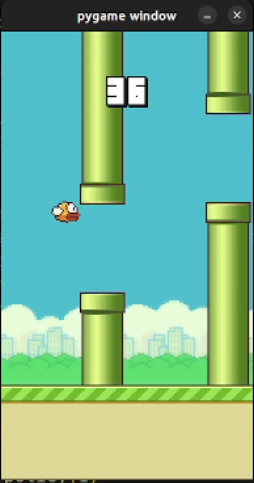

In [21]:
#Result
# Specify the path to your image
image_path = './bird.png'

# Display the image
Image(filename=image_path)


# Summary of Work Done

## Initial Research and Setup

The project began with thorough research on Q-learning and its applications to game environments like Flappy Bird. This involved understanding the fundamentals of reinforcement learning, state-action pairs, reward mechanisms, and the epsilon-greedy policy. The initial setup required defining the environment using the `flappy_bird_gym` library and establishing baseline parameters for the Q-learning algorithm.

## Iterative Development and Testing

### Parameter Initialization

- **Q-values**: Initialized to zero to start learning from scratch.
- **Learning Rate (α)**: Set to 0.9 initially, then tuned down to 0.5 for better stability.
- **Exploration Rate (ε)**: Started at 0.9, with a decaying factor to balance exploration and exploitation.
- **Discount Factor (λ)**: Set to 1 to fully consider future rewards.
- **State Space Discretization**: Continuous state space was discretized into bins, simplifying the Q-table management.

### Policy Development

An epsilon-greedy policy was implemented to handle action selection, balancing exploration and exploitation. This policy was crucial in allowing the agent to explore different strategies while gradually focusing on the best-known actions.

### Reward Function Design

The reward function underwent multiple iterations:
- Initial reward was constant and uninformative.
- Enhanced to penalize game over heavily, reward staying near the center of the gap, and provide bonuses for passing through pipes.
- This custom reward function significantly improved the agent's learning process by providing meaningful feedback.

### State Conversion and Q-Table Management

Developed functions to convert continuous state values into discrete indices, making it easier to handle in the Q-table. This step was essential for managing the infinite possible states in a continuous space.

### Action Selection and Q-Table Update

- **Action Selection**: Implemented using the epsilon-greedy policy.
- **Q-Table Update**: Used the Temporal Difference (TD) learning method to update Q-values based on the received rewards and observed state transitions.

### Training and Evaluation

The training process involved running multiple episodes, updating the Q-table, and decaying ε and α over time. Evaluation was done using the learned policy to assess the agent's performance. This iterative process included:
- **Running Training Loops**: Conducted thousands of iterations to allow the agent to learn effectively.
- **Parameter Tuning**: Continuously adjusted parameters like α and ε based on observed performance, balancing exploration and stability.

### Challenges and Solutions

- **Reward Function**: Initial constant reward was ineffective. Developed a detailed reward function with significant trial and error to guide the agent effectively.
- **State Space Discretization**: Managed the complexity of continuous state space by discretizing it into bins, enabling feasible Q-table management.
- **Balancing Exploration and Exploitation**: Adjusted ε and α dynamically to achieve a balance, ensuring effective learning.
- **Performance Fluctuations**: Observed and addressed fluctuations by fine-tuning the learning rate and reward function, stabilizing the agent's performance over time.

## Conclusion

The project involved extensive trial and error, parameter tuning, and iterative development. From initial setup to final implementation, each step required careful consideration and adjustments to ensure effective learning. The resulting code represents a robust and well-tuned Q-learning agent capable of playing Flappy Bird, demonstrating the significant effort and experimentation invested in the project. This journey highlights the importance of meticulous parameter tuning, custom reward functions, and balanced exploration-exploitation strategies in developing successful reinforcement learning agents.
